In [1]:
#!pip install selenium
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [1]:
import json
from collections import defaultdict
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
from selenium.webdriver.common.by import By

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

PATH = '/chromedriver_mac_arm64/chromedriver'


l=list()
o={}

target_url = "https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true"

driver=webdriver.Chrome(PATH)

driver.get(target_url)

driver.maximize_window()
time.sleep(2)

resp = driver.page_source

driver.find_element_by_xpath("M13.34 12l5.38-5.38a.95.95 0 00-1.34-1.34L12 10.66 6.62 5.28a.95.95 0 00-1.34 1.34L10.66 12l-5.38 5.38a.95.95 0 001.34 1.34L12 13.34l5.38 5.38a.95.95 0 001.34-1.34z").click()
#driver.close()
driver.find_

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()

driver.maximize_window()

In [ ]:
driver = webdriver.Chrome()
# driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")
driver.get("https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?clickSource=searchBox")
jobs = []
num_jobs = 900
verbose = True
while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(4)

        #Test for the "Sign Up" prompt and get rid of it.
#         try:
#             driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()
#         except ElementClickInterceptedException:
#             pass

#         time.sleep(.1)

        try:
            driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()  #clicking to the X.
        except NoSuchElementException:
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
        
              
        for job_button in job_buttons:  
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            
            if len(jobs) >= num_jobs:
                break
                
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass
            
#             job_button.click()
            
            try:
                job_button.click()
            except NoSuchElementException:
                print(job_button.text)

      
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass

            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    if driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]'):
                        company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
                    else:
                        try:
                            company_name = driver.find_element(By.CSS_SELECTOR, '[class="d-flex justify-content-between"]').text
                        except:
                            NoSuchElementException
                    location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
                    job_title = driver.find_element(By.CSS_SELECTOR, '[class="css-1vg6q84 e1tk4kwz4"]').text
                    job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
                    # salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1xe2xww e1wijj242"]').text
                    collected_successfully = True
#                     if len(job_title)<1:
#                         time.sleep(5)
#                         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="jobTitle"]').text
                except:
                    time.sleep(5)
                    
                    
            # class="d-flex justify-content-between"

            try:
#                 salary_element = WebDriverWait(driver, 10).until(
#                                     EC.presence_of_element_located((By.CSS_SELECTOR, "[class='css-1bluz6i e2u4hf13']")))
                salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1bluz6i e2u4hf13"]').get_attribute("textContent")
#                 salary_estimate = salary_element.text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            
            #try:
            overview_name = driver.find_elements(By.CSS_SELECTOR, '[class="css-1taruhi e1pvx6aw1"]')
            overview_name_list = [element.text for element in overview_name]
            overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
            overview_list = [element.text for element in overview]
#             for name, value in zip(overview_name_list, overview_list):
            if "Size" in overview_name_list:
                size = overview_list[overview_name_list.index("Size")]
            else:
                size = -1

            if "Founded" in overview_name_list:
                founded = overview_list[overview_name_list.index("Founded")]
            else:
                founded = -1

            if "Type" in overview_name_list:
                type_of_ownership = overview_list[overview_name_list.index("Type")]
            else:
                type_of_ownership = -1

            if "Industry" in overview_name_list:
                industry = overview_list[overview_name_list.index("Industry")]
            else:
                industry = -1

            if "Sector" in overview_name_list:
                sector = overview_list[overview_name_list.index("Sector")]
            else:
                sector = -1

            if "Revenue" in overview_name_list:
                revenue = overview_list[overview_name_list.index("Revenue")]
            else:
                revenue = -1

#                     founded = overview[1].text
#                     type_of_ownership = overview[2].text
#                     industry = overview[3].text
#                     sector = overview[4].text
#                     revenue = overview[5].text
#                 else:# NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
#                     headquarters = -1
#                     size = -1
#                     founded = -1
#                     type_of_ownership = -1
#                     industry = -1
#                     sector = -1
#                     revenue = -1

                
            if verbose:
                # print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                # print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            #"Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element(By.CSS_SELECTOR, '[aria-label="Next"]').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

In [ ]:
first_scrape = jobs
first_scrape

In [ ]:
import pandas as pd
stored_dataframe = pd.read_csv('glassdoor_ds_job_salary.csv')

In [ ]:
newly_scraped = pd.DataFrame(first_scrape)

In [ ]:

new_df = pd.concat([stored_dataframe, newly_scraped], axis=0)


In [ ]:
new_df.drop_duplicates()

In [ ]:
updated_scraped = new_df.drop_duplicates()

In [ ]:
updated_scraped.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
stored_dataframe

In [ ]:
second_scrape = jobs
second_scrape

In [ ]:
combined_first_second = first_scrape + second_scrape + third_scrape + success_list
len(combined_first_second)

In [ ]:
third_scrape = jobs
len(third_scrape)

In [ ]:
import json
unique_values = set(json.dumps(d) for d in success_list)

print(len(unique_values))
unique_values

In [ ]:
success_list = jobs
len(success_list)
success_set = set(json.dumps(d) for d in success_list)
len(success_set)

In [ ]:
from collections import defaultdict
def frequencies(lst):
    freq = defaultdict(int)
    for val in lst:
        freq[val] += 1
    return dict(freq)



In [ ]:
list = [1, 2, 3]
frequencies(list)

In [ ]:
success_lst = [json.dumps(d) for d in success_list]

In [ ]:
successs_dict = frequencies(success_lst)

In [ ]:
type(successs_dict)

In [ ]:
for key, value in successs_dict.items():
    print(value)

In [ ]:
successs_dict

In [ ]:
success_lst = [json.dumps(d) for d in success_list]
print(len(success_lst)
print(frequencies(success_lst))

In [ ]:
first_scrape.extend(second_scrape)

In [ ]:
response = requests.get(target_url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")
soup = BeautifulSoup(response.content, 'html.parser')
allJobsContainer = soup.find("ul")

#allJobs = allJobsContainer.find_all("li")

In [ ]:
response.status_code

In [ ]:
allJobsContainer

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()
job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
for job_button in job_buttons: 
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass
    job_button.click()
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass

            
# collected_successfully = False

# while not collected_successfully:
#     try:
#         company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
#         location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
#         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="job-link"]').text
#         job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
#         collected_successfully = True
#     except:
#         time.sleep(5)
                    
#     try:
#         salary_estimate = driver.find_element(By.CSS_SELECTOR, '[data-test="detailSalary"]').text
#     except NoSuchElementException:
#         salary_estimate = -1 #You need to set a "not found value. It's important."

#     try:
#         rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
#     except NoSuchElementException:
#         rating = -1 #You need to set a "not found value. It's important."
        
# overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
# #for each in overview:
# size = overview[0].text
# founded = overview[1].text
# type_of_ownership = overview[2].text
# industry = overview[3].text
# sector = overview[4].text
# revenue = overview[5].text
    #print(each.text)
driver.maximize_window()


In [ ]:
company_name

In [ ]:
location

In [ ]:
job_title

In [ ]:
job_description

In [ ]:
salary_estimate

In [ ]:
rating

In [ ]:
size

In [ ]:
founded

In [ ]:
type_of_ownership

In [ ]:
industry

In [ ]:
sector

In [ ]:
revenue

In [ ]:
job_buttons

In [ ]:
type(job_title)

In [ ]:
import pandas as pd
df = pd.DataFrame(combined_first_second)
df

In [ ]:
df_no_dup = df.drop_duplicates()

In [ ]:
df_no_dup.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
newly_scraped

After webscraping the data, we put it into a csv file.


<h1>DATA CLEANING SECTION</h1>

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Data Scientist\nJob Category: Science\nTime Ty...,4.0,CACI\n4.0,"Charlottesville, VA",10000+ Employees,1962,Company - Public,Aerospace & Defense,Aerospace & Defense,$1 to $5 billion (USD)
1,Designer UIX NLP/NLU,"$117,500 /yr (est.)",* W2 Only *\nThe successful candidate will pro...,-1.0,"RightFit Talent Brokers, LLC",Remote,-1,-1,-1,-1,-1,-1
2,Machine Learning Engineer,"$129,337 /yr (est.)",Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",-1,-1,-1,-1,-1,-1
3,Senior Algorithms & Machine Learning Scientist,"$129,163 /yr (est.)","Job Summary:\n\nWalgreens, one of the nation's...",3.1,WALGREENS\n3.1,"Chicago, IL",10000+ Employees,1901,Company - Public,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
4,Data Scientist with AI and ML experience,"$140,000 /yr (est.)",Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,-1,-1,-1,-1,-1,-1


In [7]:
df['Type of ownership'].value_counts()

Company - Private                 492
Company - Public                  342
-1                                204
Nonprofit Organization             46
Subsidiary or Business Segment     36
College / University               33
Contract                           23
Government                         12
Unknown                            12
Hospital                            9
Self-employed                       9
School / School District            3
Private Practice / Firm             2
Franchise                           1
Name: Type of ownership, dtype: int64

In [8]:
df['Founded'].value_counts()

-1       493
 1999     22
 1981     19
 1969     18
 2004     16
        ... 
 1860      1
 1852      1
 1908      1
 1846      1
 1956      1
Name: Founded, Length: 155, dtype: int64

In [9]:
#The column Type of ownership and Founded do not seem to be so acurated and useful, so we'll remove it
df.drop(['Type of ownership', 'Founded'], axis=1, inplace=True)

In [10]:
#we first check for duplicates
print(f"There are {df.duplicated().sum()} duplicates")

# remove duplicates
df.drop_duplicates(inplace=True)

There are 167 duplicates


In [11]:
# check for missing values
df.isna().sum()

Job Title           0
Salary Estimate     0
Job Description     0
Rating              0
Company Name        0
Location           14
Size                0
Industry            0
Sector              0
Revenue             0
dtype: int64

We are now going to handle the most important part of hour dataset: salary estimate

In [12]:
#remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

# We first Count the number of rows with -1 as salary estimate (which means it is missing)
count = df[df['Salary Estimate'] == '-1'].shape[0]
print(f'There are {count} rows with a missing salary estimate')

#remove those rows
df = df[df['Salary Estimate'] != '-1']

There are 167 rows with a missing salary estimate


In [13]:
import re

#Let's check if all the salaries have the same format. For example: $131,400 /yr (est.)


# Define regular expression pattern to check format
pattern = r'\$\d{1,3}(,\d{3})*\s?\/yr\s?\(est.\)'

# Check if all values in the Salary Estimate column have the expected format
matches = df['Salary Estimate'].apply(lambda x: bool(re.match(pattern, x)))

not_matching = df[~matches]
print(f'Number of Values in the Salary Estimate column have do not have the expected format: {len(not_matching)}')
#not_matching

Number of Values in the Salary Estimate column have do not have the expected format: 127


In [14]:
# We realize that some salaries are expressed at a hourly rate, instead of a yearly rate.


# Identify rows with hourly salary values
hourly_mask = df['Salary Estimate'].str.contains('/hr')

# Convert hourly salary values to yearly salary values
df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


# Remove any non-numeric characters and convert to numeric
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

#We now have in our salary estimate column yearly salaries expressed as integers


In [15]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
1,Designer UIX NLP/NLU,117500,* W2 Only *\nThe successful candidate will pro...,-1.0,"RightFit Talent Brokers, LLC",Remote,-1,-1,-1,-1
2,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",-1,-1,-1,-1
3,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\n\nWalgreens, one of the nation's...",3.1,WALGREENS\n3.1,"Chicago, IL",10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
4,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,-1,-1,-1,-1
5,Machine Learning Engineer,112751,Supports and performs the development and prog...,3.7,Vanguard\n3.7,"Philadelphia, PA",10000+ Employees,Investment & Asset Management,Financial Services,Unknown / Non-Applicable


In [16]:
#cleaning a little bit the job description
df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
1,Designer UIX NLP/NLU,117500,* W2 Only * The successful candidate will prov...,-1.0,"RightFit Talent Brokers, LLC",Remote,-1,-1,-1,-1
2,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",-1,-1,-1,-1
3,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,"Chicago, IL",10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
4,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,-1,-1,-1,-1
5,Machine Learning Engineer,112751,Supports and performs the development and prog...,3.7,Vanguard\n3.7,"Philadelphia, PA",10000+ Employees,Investment & Asset Management,Financial Services,Unknown / Non-Applicable


In [17]:
print(df.dtypes)

Job Title           object
Salary Estimate      int64
Job Description     object
Rating             float64
Company Name        object
Location            object
Size                object
Industry            object
Sector              object
Revenue             object
dtype: object


In [18]:
#check null values in the whole database
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 1 to 1223
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        890 non-null    object 
 1   Salary Estimate  890 non-null    int64  
 2   Job Description  890 non-null    object 
 3   Rating           890 non-null    float64
 4   Company Name     890 non-null    object 
 5   Location         877 non-null    object 
 6   Size             890 non-null    object 
 7   Industry         890 non-null    object 
 8   Sector           890 non-null    object 
 9   Revenue          890 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 76.5+ KB


In [19]:
rows_with_null = df[df.isnull().any(axis=1)]
print(f"Len:{len(rows_with_null)}")
rows_with_null.head()

Len:13


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
54,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,NaN,10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
66,"PhD Director, Data Science R&D (Decision Scien...",105882,"Job Description In this role, you will assume...",3.9,Epsilon\n3.9,NaN,5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,$1 to $5 billion (USD)
76,"Sr Manager, Data Science",120353,"At HCSC, we consider our employees the corners...",4.0,HCSC\n4.0,NaN,10000+ Employees,Insurance Carriers,Insurance,Unknown / Non-Applicable
95,Data Scientist - Supply Planning,100638,Beam Suntory is Crafting the Spirits that Stir...,3.9,Beam Inc.\n3.9,NaN,5001 to 10000 Employees,Food & Beverage Manufacturing,Manufacturing,$1 to $5 billion (USD)
119,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,NaN,Unknown,-1,-1,Unknown / Non-Applicable


Check each column and handle strange values (if exists)

In [20]:
import numpy as np
df['Location'].unique()

array(['Remote', 'Millersville, MD', 'Chicago, IL', 'Philadelphia, PA',
       'Houston, TX', 'Washington, DC', 'Dallas, TX', 'Estero, FL',
       'Boston, MA', 'Chantilly, VA', 'New York, NY', 'Reno, NV',
       'Manhattan', 'Coppell, TX', 'Santa Clara, CA', 'Fond du Lac, WI',
       'Phoenix, AZ', 'San Francisco, CA', 'Research Triangle Park, NC',
       'Richardson, TX', 'Palo Alto, CA', 'Clark, NJ', 'Somerville, MA',
       'Waltham, MA', 'Illinois', 'Wellesley Hills, MA', 'Beaverton, OR',
       'Arlington, VA', 'Cleveland, OH', 'Bethesda, MD', 'Pasadena, CA',
       'Seattle, WA', 'California', 'San Diego, CA', nan,
       'Salt Lake City, UT', 'Reston, VA', 'Long Beach, CA',
       'Riverwoods, IL', 'Denver, CO', 'Tampa, FL', 'Middletown, CT',
       'Portland, ME', 'Atlanta, GA', 'Durham, NC', 'Fort Meade, MD',
       'Lake Forest, CA', 'Jersey City, NJ', 'Princeton, NJ',
       'Stamford, CT', 'Wilmington, NC', 'Carlsbad, CA', 'Irving, TX',
       'Austin, TX', 'Frederick, MD'

In [21]:
df[df['Location'].apply(lambda x: isinstance(x, float))]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
54,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,NaN,10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
66,"PhD Director, Data Science R&D (Decision Scien...",105882,"Job Description In this role, you will assume...",3.9,Epsilon\n3.9,NaN,5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,$1 to $5 billion (USD)
76,"Sr Manager, Data Science",120353,"At HCSC, we consider our employees the corners...",4.0,HCSC\n4.0,NaN,10000+ Employees,Insurance Carriers,Insurance,Unknown / Non-Applicable
95,Data Scientist - Supply Planning,100638,Beam Suntory is Crafting the Spirits that Stir...,3.9,Beam Inc.\n3.9,NaN,5001 to 10000 Employees,Food & Beverage Manufacturing,Manufacturing,$1 to $5 billion (USD)
119,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,NaN,Unknown,-1,-1,Unknown / Non-Applicable
120,"Data Scientist, Ecosystem",160665,About Pinterest: Millions of people across the...,4.0,Pinterest\n4.0,NaN,1001 to 5000 Employees,Internet & Web Services,Information Technology,$100 to $500 million (USD)
122,Data Scientist,1508000,Position: Data Scientist (Strong PowerBI knowl...,5.0,Avis Technologies\n5.0,NaN,Unknown,-1,-1,Unknown / Non-Applicable
129,Machine Learning Engineer,117711,Job Information Number of Positions 1 Industry...,4.0,LeewayHertz\n4.0,NaN,51 to 200 Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable
167,Applied Machine Learning Scientist - Data Tech...,205000,Who we are: The Bloomberg Engineering Data Tec...,4.1,Bloomberg\n4.1,NaN,10000+ Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable
168,Deep Machine Learning Engineer (Expert Level P...,375000,Refer a friend: Referral fee program BIO/PHAR...,5.0,Career Developers\n5.0,NaN,1 to 50 Employees,HR Consulting,Human Resources & Staffing,Less than $1 million (USD)


In [22]:
#adding a column for the state

df['Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
df['Job State'].value_counts()

TX    89
CA    88
te    79
NY    63
VA    61
MA    48
IL    42
NJ    35
MD    28
NC    25
WA    23
CO    20
OH    20
CT    19
PA    19
FL    18
DC    18
GA    17
MN    11
WI    11
MI    10
TN    10
UT     9
IN     8
OR     8
AL     7
AZ     6
SC     6
DE     6
es     6
MO     5
OK     5
IA     5
ID     4
NH     4
AR     4
LA     3
MS     3
ia     3
NM     3
on     3
KS     3
HI     3
RI     2
KY     2
ME     2
NV     2
NE     1
na     1
ts     1
ah     1
VT     1
do     1
co     1
as     1
is     1
an     1
ma     1
Name: Job State, dtype: int64

In [23]:
df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
df.loc[df['Job State'] == 'es', 'Job State'] = np.nan #United States
df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
df.loc[df['Job State'] == 'ah', 'Job State'] = 'UT' #Utah
df.loc[df['Job State'] == 'do', 'Job State'] = 'CO' #Colorado
df.loc[df['Job State'] == 'co', 'Job State'] = 'NM' #new mexico
df.loc[df['Job State'] == 'na', 'Job State'] = 'NC' #North Carolina
df.loc[df['Job State'] == 'ma', 'Job State'] = 'AL' #Alabama
df['Job State'].value_counts()

CA        91
TX        90
Remote    79
NY        64
VA        61
MA        49
IL        43
NJ        35
MD        28
NC        26
WA        23
CO        21
OH        20
PA        19
CT        19
DC        18
FL        18
GA        17
OR        11
WI        11
MN        11
MI        10
TN        10
UT        10
IN         8
AL         8
AZ         6
SC         6
DE         6
MO         5
IA         5
OK         5
ID         4
NH         4
NM         4
AR         4
MS         3
LA         3
HI         3
KS         3
RI         2
NV         2
ME         2
KY         2
VT         1
NE         1
Name: Job State, dtype: int64

In [24]:
#df[df['Job State']=='ma']

In [25]:
#Rating cleaning
df['Rating'].unique() #-1 as strange value
df.loc[df['Rating'] == -1, 'Rating'] = np.nan
df['Rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 890 entries, 1 to 1223
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
767 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [26]:
df['Company Name'].unique()


array(['RightFit Talent Brokers, LLC', 'Signal Systems Corporation',
       'WALGREENS\n3.1', 'innoVet Health, LLC', 'Vanguard\n3.7',
       'Patterson-UTI\n3.7', 'InfiNetix, Inc.',
       'Scottish Rite for Children\n3.9', 'Hertz\n3.2',
       'Sitewise Analytics', 'Synchron, LLC\n4.1', 'Veolia\n3.8',
       'The Aerospace Corporation\n4.2', 'D. E. Shaw & Co., L.P.\n4.5',
       'LegalMatch\n3.7', 'Smart AdServer\n4.5', 'AAA Texas\n3.0',
       'Kett Engineering Corporation\n3.1',
       'Society Insurance Company\n3.8', "Harlem Children's Zone\n3.0",
       'MatchPointe Group', 'JumpSmart', 'Sciome LLC',
       'Lymba Corporation\n3.5', 'Tencent\n4.1', 'Elevance Health\n3.7',
       "L'Oreal\n4.0", 'Massachusetts General Hospital(MGH)\n4.0',
       'Illumination Works', 'Boston Dynamics\n4.7',
       'Kraft Heinz Company\n3.4', 'Sun Life\n3.8', 'Nike\n4.1',
       'Stemuli Studios Inc.\n3.7', 'CNA\n4.0', 'Sherwin-Williams\n3.8',
       'RiverNorth, Inc.', 'Expatiate Communications\n2

In [27]:
#clening company name
df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
df['Company Name'].unique()


array(['RightFit Talent Brokers, LLC', 'Signal Systems Corporation',
       'WALGREENS', 'innoVet Health, LLC', 'Vanguard', 'Patterson-UTI',
       'InfiNetix, Inc.', 'Scottish Rite for Children', 'Hertz',
       'Sitewise Analytics', 'Synchron, LLC', 'Veolia',
       'The Aerospace Corporation', 'D. E. Shaw & Co., L.P.',
       'LegalMatch', 'Smart AdServer', 'AAA Texas',
       'Kett Engineering Corporation', 'Society Insurance Company',
       "Harlem Children's Zone", 'MatchPointe Group', 'JumpSmart',
       'Sciome LLC', 'Lymba Corporation', 'Tencent', 'Elevance Health',
       "L'Oreal", 'Massachusetts General Hospital(MGH)',
       'Illumination Works', 'Boston Dynamics', 'Kraft Heinz Company',
       'Sun Life', 'Nike', 'Stemuli Studios Inc.', 'CNA',
       'Sherwin-Williams', 'RiverNorth, Inc.', 'Expatiate Communications',
       'UTHealth Houston', 'University of Washington',
       'ThirdEye Data Inc.', 'iprecruiter Group', 'MissionWired',
       'Arivo Acceptance LLC', 'Lei

In [28]:
#reformatting and cleaning size
df.loc[df['Size'] == '1 to 50 Employees', 'Size'] = '1 - 50'
df.loc[df['Size'] == '51 to 200 Employees', 'Size'] = '51 - 200'
df.loc[df['Size'] == '201 to 500 Employees', 'Size'] = '201 - 500'
df.loc[df['Size'] == '501 to 1000 Employees', 'Size'] = '501 - 1000'
df.loc[df['Size'] == '1001 to 5000 Employees', 'Size'] = '1001 - 5000'
df.loc[df['Size'] == '5001 to 10000 Employees', 'Size'] = '5001 - 10000'
df.loc[df['Size'] == '10000+ Employees', 'Size'] = '10000+'
df.loc[df['Size'] == '-1', 'Size'] = np.nan
df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
df['Size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 890 entries, 1 to 1223
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
752 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [29]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            301
$10+ billion (USD)                  129
$1 to $5 billion (USD)               86
-1                                   84
$5 to $25 million (USD)              62
$100 to $500 million (USD)           62
$25 to $100 million (USD)            57
$1 to $5 million (USD)               38
$5 to $10 billion (USD)              35
$500 million to $1 billion (USD)     23
Less than $1 million (USD)           13
Name: Revenue, dtype: int64

In [30]:
#reformatting and cleaning revues (million $)
df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
df['Revenue'].info()

<class 'pandas.core.series.Series'>
Int64Index: 890 entries, 1 to 1223
Series name: Revenue
Non-Null Count  Dtype 
--------------  ----- 
505 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


In [31]:
#cleaning Industry and Sector
df['Industry'].value_counts()
df.loc[df['Industry'] == '-1', 'Industry'] = np.nan
#df['Industry'].info()

df['Sector'].value_counts()
df.loc[df['Sector'] == '-1', 'Sector'] = np.nan
#df['Sector'].info()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 1 to 1223
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        890 non-null    object 
 1   Salary Estimate  890 non-null    int64  
 2   Job Description  890 non-null    object 
 3   Rating           767 non-null    float64
 4   Company Name     890 non-null    object 
 5   Location         877 non-null    object 
 6   Size             752 non-null    object 
 7   Industry         716 non-null    object 
 8   Sector           716 non-null    object 
 9   Revenue          505 non-null    object 
 10  Job State        871 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 83.4+ KB


In [33]:
#cleaning

In [34]:
import pandas as pd

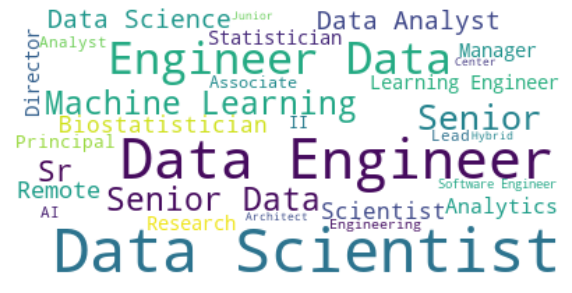

In [35]:
#make a prior analysis to understand the most recurrent job titles

titles = " ".join(df['Job Title'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 30)
wc.generate(titles)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

#print(wc.words_)

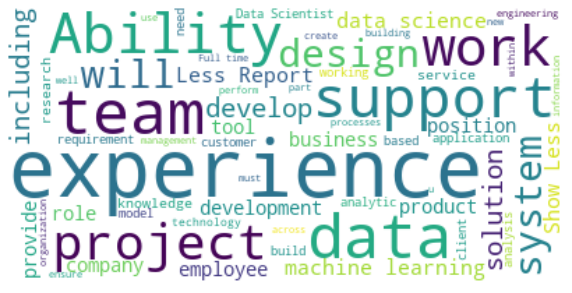

In [36]:
#giving a look also to the job description

words = " ".join(df['Job Description'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 60)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data scientist' or 'scientist data' in title_lower:
        return 'data scientist'
    elif 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' or 'data analyst' in title_lower:
        return 'data analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    else:
        return None

    


In [38]:
#applying it to the database
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)
df['Job Simplified'].value_counts() 

data scientist    890
Name: Job Simplified, dtype: int64

In [39]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    elif 'analyst':
        return 'analyst'
    else:
        return None

In [40]:
#applying it to the database
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts() 

analyst      591
senior       225
jr            23
executive     19
manager       17
associate     15
Name: Seniority, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 1 to 1223
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        890 non-null    object 
 1   Salary Estimate  890 non-null    int64  
 2   Job Description  890 non-null    object 
 3   Rating           767 non-null    float64
 4   Company Name     890 non-null    object 
 5   Location         877 non-null    object 
 6   Size             752 non-null    object 
 7   Industry         716 non-null    object 
 8   Sector           716 non-null    object 
 9   Revenue          505 non-null    object 
 10  Job State        871 non-null    object 
 11  Job Simplified   890 non-null    object 
 12  Seniority        890 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 97.3+ KB


In [42]:
pd.options.display.float_format = '{:.0f}'.format 
df.describe()

#many outliers in the 4th range: we have to restrict it

,Salary Estimate,Rating
count,890,767
mean,40819415989705,4
std,711983459474120,1
min,3500,1
25%,92178,4
50%,113955,4
75%,150000,4
max,13663519999999998,5


<h2>Data Cleaning Functions needed</h2>

In [101]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' in title_lower:
        return 'analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    elif 'data architect' in title_lower:
        return 'data architect'
    elif 'data modeler' in title_lower:
        return 'data modeler'
    elif 'database administrator' in title_lower:
        return 'database administrator'
    if 'data scientist' or 'scientist data' in title_lower:
        return 'data scientist'
    else:
        return None

In [102]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    else:
        return None

In [103]:
#Defining a function to make a Vader sentiment analysis on each job description. We'll use the compound score as our result
def vader_analysis(text):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    from nltk import sent_tokenize
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(text)
    compound=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        compound+=vs['compound']/(len(sentences))
    return compound  

In [106]:
# Disable SettingWithCopyWarning

#first data cleaning function: basic one

pd.options.mode.chained_assignment = None
import re
def clean_data(df):
    
    #remove duplicates
    #print(f"There are {df.duplicated().sum()} duplicates")
    df.drop_duplicates(inplace=True)
    
    #remove unnecessary columns
    df.drop(['Type of ownership', 'Founded'], axis=1, inplace=True)
    
    #remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

    # We first Count the number of rows with -1 as salary estimate (which means it is missing)
    #count = df[df['Salary Estimate'] == '-1'].shape[0]
    #print(f'There are {count} rows with a missing salary estimate')

    #remove those rows
    df = df[df['Salary Estimate'] != '-1']
    
    # Identify rows with hourly salary values
    hourly_mask = df['Salary Estimate'].str.contains('/hr')

    # Convert hourly salary values to yearly salary values
    df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


    # Remove any non-numeric characters and convert to numeric
    df.loc[:, 'Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

    df.loc[:,'Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

    #We now have in our salary estimate column yearly salaries expressed as integers
    
    #cleaning a little bit the job description
    df.loc[:,'Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
    
    #adding a column for the state
    df.loc[:,'Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
    
    #make some cleaning on it
    df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
    df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
    df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
    df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
    df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
    df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
    df.loc[df['Job State'] == 'es', 'Job State'] = None #United States
    df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
    df.loc[df['Job State'] == 'ah', 'Job State'] = 'UT' #Utah
    df.loc[df['Job State'] == 'co', 'Job State'] = 'NM' #New Mexico
    df.loc[df['Job State'] == 'do', 'Job State'] = 'CO' #Colorado
    df.loc[df['Job State'] == 'na', 'Job State'] = 'NC' #North Carolina
    df.loc[df['Job State'] == 'ma', 'Job State'] = 'AL' #Alabama
    
    #Seting Size NaN
    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    
    #reformatting properly the company name
    #df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
    df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\r', '').strip()[:-4] if '\n' in x else x.replace('\r', '').strip())

    #reformatting and cleaning size
    df.loc[df['Size'] == '1 to 50 Employees', 'Size'] = '1 - 50'
    df.loc[df['Size'] == '51 to 200 Employees', 'Size'] = '51 - 200'
    df.loc[df['Size'] == '201 to 500 Employees', 'Size'] = '201 - 500'
    df.loc[df['Size'] == '501 to 1000 Employees', 'Size'] = '501 - 1000'
    df.loc[df['Size'] == '1001 to 5000 Employees', 'Size'] = '1001 - 5000'
    df.loc[df['Size'] == '5001 to 10000 Employees', 'Size'] = '5001 - 10000'
    df.loc[df['Size'] == '10000+ Employees', 'Size'] = '10000+'
    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
    #reformatting and cleaning revenues (million $)
    df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
    df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
    df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
    df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
    df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
    df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
    df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
    df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
    df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
    df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
    df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
    
    #cleaning Industry and Sector
    
    df.loc[df['Industry'] == '-1', 'Industry'] = None
    
    df.loc[df['Sector'] == '-1', 'Sector'] = None
    
    #adding Job Simplified column
    df.loc[:,'Job Simplified'] = (df['Job Title']).apply(title_simplifier)
    
    #adding Seniority column
    df.loc[:,'Seniority'] = (df['Job Title']).apply(seniority)
    
    # Identify any outliers based on the box plot and remove them using boolean indexing
    df = df[df['Salary Estimate'] > 15080]  #They must all be positive
    df = df[df['Salary Estimate'] < 1000000]  #Values under 2M$ seem legit salaries
    
    #remove jr data scientists with high salary
    df = df.loc[~((df['Seniority']=='jr') & (df['Salary Estimate']>200000))]
    
    #Assumption: if a company get 1 million revenue cannot pay an employee more than 200000 $
    df = df[~((df['Revenue'] == '0 - 1') & (df['Salary Estimate'] > 200000))]
    
    #Adding the compund result of the Vader sentiment analysis
    df['Vader']=df['Job Description'].apply(lambda x: vader_analysis(x))
    return df


In [107]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')
df = clean_data(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        951 non-null    object 
 1   Salary Estimate  951 non-null    int64  
 2   Job Description  951 non-null    object 
 3   Rating           951 non-null    float64
 4   Company Name     951 non-null    object 
 5   Location         939 non-null    object 
 6   Size             797 non-null    object 
 7   Industry         762 non-null    object 
 8   Sector           762 non-null    object 
 9   Revenue          530 non-null    object 
 10  Job State        934 non-null    object 
 11  Job Simplified   951 non-null    object 
 12  Seniority        299 non-null    object 
 13  Vader            951 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 111.4+ KB


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        951 non-null    object 
 1   Salary Estimate  951 non-null    int64  
 2   Job Description  951 non-null    object 
 3   Rating           951 non-null    float64
 4   Company Name     951 non-null    object 
 5   Location         939 non-null    object 
 6   Size             797 non-null    object 
 7   Industry         762 non-null    object 
 8   Sector           762 non-null    object 
 9   Revenue          530 non-null    object 
 10  Job State        934 non-null    object 
 11  Job Simplified   951 non-null    object 
 12  Seniority        299 non-null    object 
 13  Vader            951 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 111.4+ KB


In [7]:
pd.options.display.float_format = '{:.0f}'.format 
df.describe()



,Salary Estimate,Rating
count,951,951
mean,135261,3
std,132587,2
min,38539,-1
25%,86608,3
50%,105946,4
75%,130000,4
max,988000,5


In [8]:
value_counts = df['Salary Estimate'].value_counts()

# Sorting value counts by the index
value_counts_sorted = value_counts.sort_index()



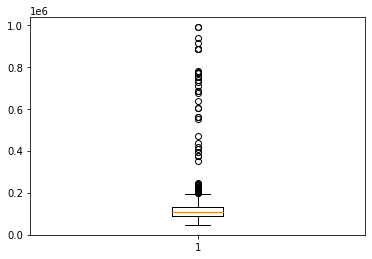

In [50]:
import matplotlib.pyplot as plt

# Create a box plot of the salary_estimate column


#There's a value which is way too higher than the others,
#Let's remove it

# Identify any outliers based on the box plot and remove them using boolean indexing
df = df[df['Salary Estimate'] > 15080]
df = df[df['Salary Estimate'] < 1000000]

plt.boxplot(df['Salary Estimate']);

#Values under 2M$ seem legit salaries

EDA

In [51]:
# get summary statistics for numerical columns
print(df.describe())

       Salary Estimate  Rating
count              797     797
mean            138400       3
std             128279       2
min              46073      -1
25%              90000       3
50%             109856       4
75%             133571       4
max             988000       5


In [52]:
# check for missing values
print(df.isnull().sum())

#If we have some columns missing too many values, then, they might be not good to build a model

#Ex. seniority can be removed, same for revenue

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location            12
Size               115
Industry           133
Sector             133
Revenue            331
Job State           17
Job Simplified       0
Seniority          525
dtype: int64


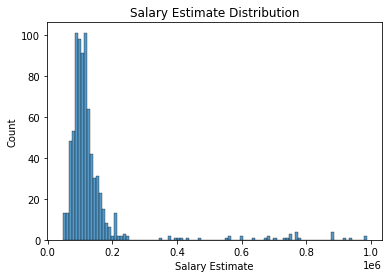

In [53]:
# plot a histogram of the Salary Estimate column
sns.histplot(data=df, x='Salary Estimate')
plt.title('Salary Estimate Distribution')
plt.show()

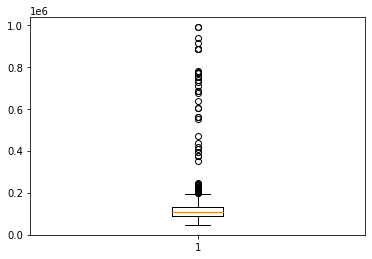

In [54]:
#Plot a boxplot of the Salary Estimate Column

plt.boxplot(df['Salary Estimate']);

Analyzing numerical variables

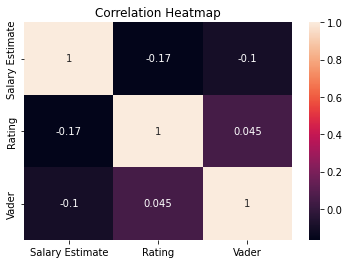

In [117]:
# plot a heatmap of correlations between numerical columns
numerical_cols = ['Salary Estimate', 'Rating', 'Vader']
sns.heatmap(data=df[numerical_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

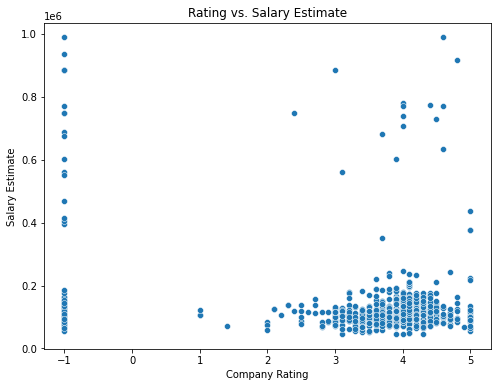

In [56]:
# plot a scatterplot of Salary Estimate vs. Rating

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Salary Estimate')
plt.xlabel('Company Rating')
plt.ylabel('Salary Estimate')
plt.title('Rating vs. Salary Estimate')
plt.show()


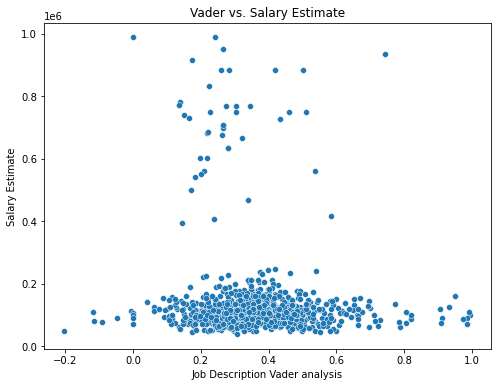

In [118]:
# plot a scatterplot of Salary Estimate vs. Vader analysis on job description

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Vader', y='Salary Estimate')
plt.xlabel('Job Description Vader analysis')
plt.ylabel('Salary Estimate')
plt.title('Vader vs. Salary Estimate')
plt.show()


In [57]:
#From the two graphs above, there seems to be very small correlation between rating and salary.
#Rating might not be an interesting variable to use in our model then

In [58]:
df['Job Simplified'].value_counts()

data scientist        471
data engineer         164
mle                    59
analyst                49
statistician           46
research scientist      5
data architect          3
Name: Job Simplified, dtype: int64

In [59]:
df['Seniority'].value_counts()

senior       205
executive     19
jr            18
associate     15
manager       15
Name: Seniority, dtype: int64

In [60]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority'],
      dtype='object')

In [61]:
df['Job State'].value_counts()

CA        80
TX        74
NY        61
VA        59
Remote    56
MA        47
IL        41
NJ        30
MD        28
NC        23
CO        19
WA        19
CT        18
PA        18
OH        18
DC        17
FL        16
GA        14
MN        11
WI        11
MI        10
UT         9
OR         9
TN         8
IN         8
AL         7
AZ         6
SC         6
IA         5
OK         5
DE         5
NH         4
MO         4
ID         4
MS         3
KS         3
AR         3
KY         2
LA         2
NM         2
ME         2
RI         2
HI         2
NV         2
na         1
co         1
NE         1
ah         1
VT         1
do         1
ma         1
Name: Job State, dtype: int64

In [62]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority'],
      dtype='object')

In [63]:
df['Company Name']

1       RightFit Talent Brokers, LLC
2         Signal Systems Corporation
3                          WALGREENS
4                innoVet Health, LLC
5                           Vanguard
                    ...             
1219                        Allstate
1220                         Peraton
1221                Kershner Trading
1222                       Pinterest
1223           Fidelity TalentSource
Name: Company Name, Length: 797, dtype: object

In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority'],
      dtype='object')

Analyzing Categorical Variables

Let's first make a barplot for every categorical variable.
It's better to make a horizontal barplot because we have too many values for each category and it would be hard to visualize them

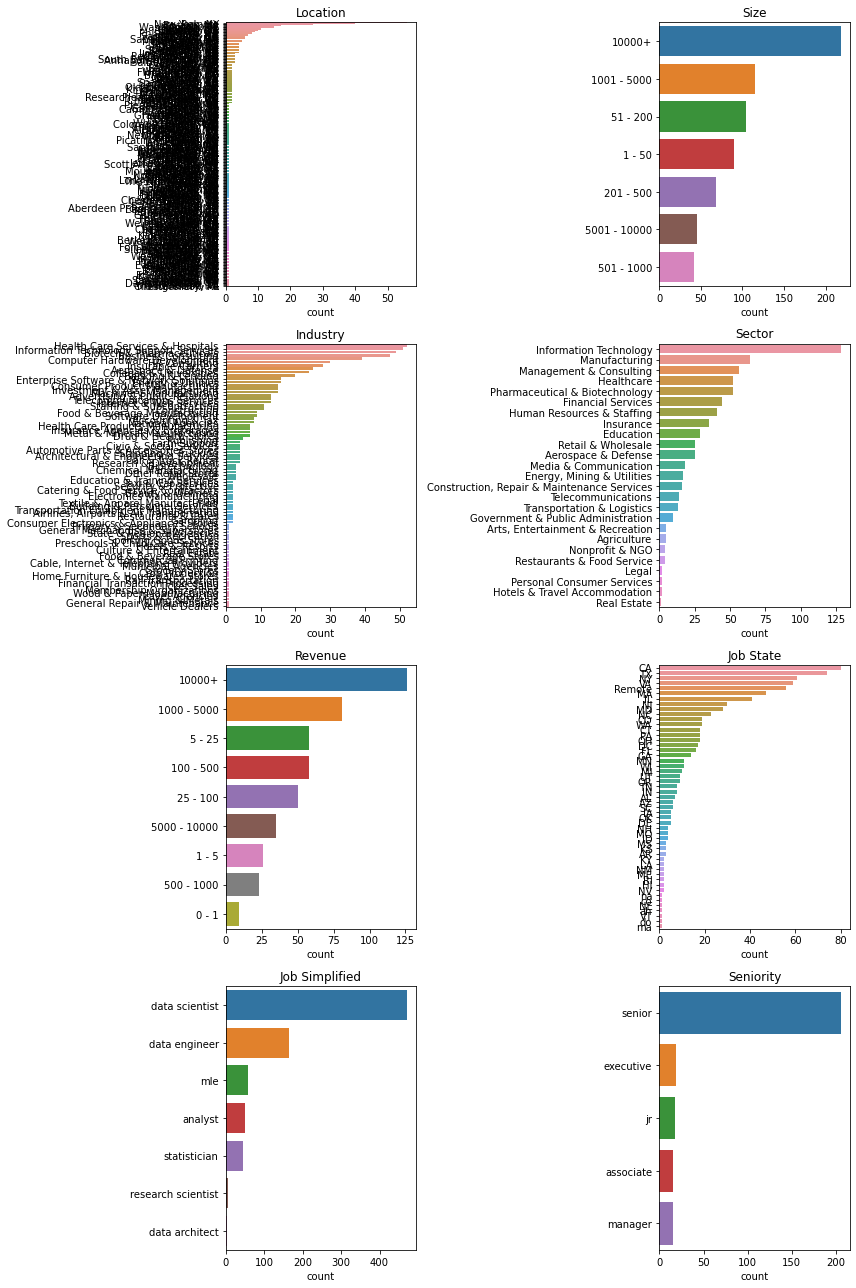

In [65]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Loop through each categorical variable and plot the countplot
for i, categorical in enumerate(categorical):
    
    

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(y=categorical, x='count', data=df[categorical].value_counts().reset_index().rename(columns={categorical: 'count', 'index': categorical}), ax=ax)
    ax.set_title(categorical)
    ax.set(ylabel='')
    
fig.tight_layout()
plt.show()

We notice that there are too many values for some categorical values, so 
it would be better to just display the top 20

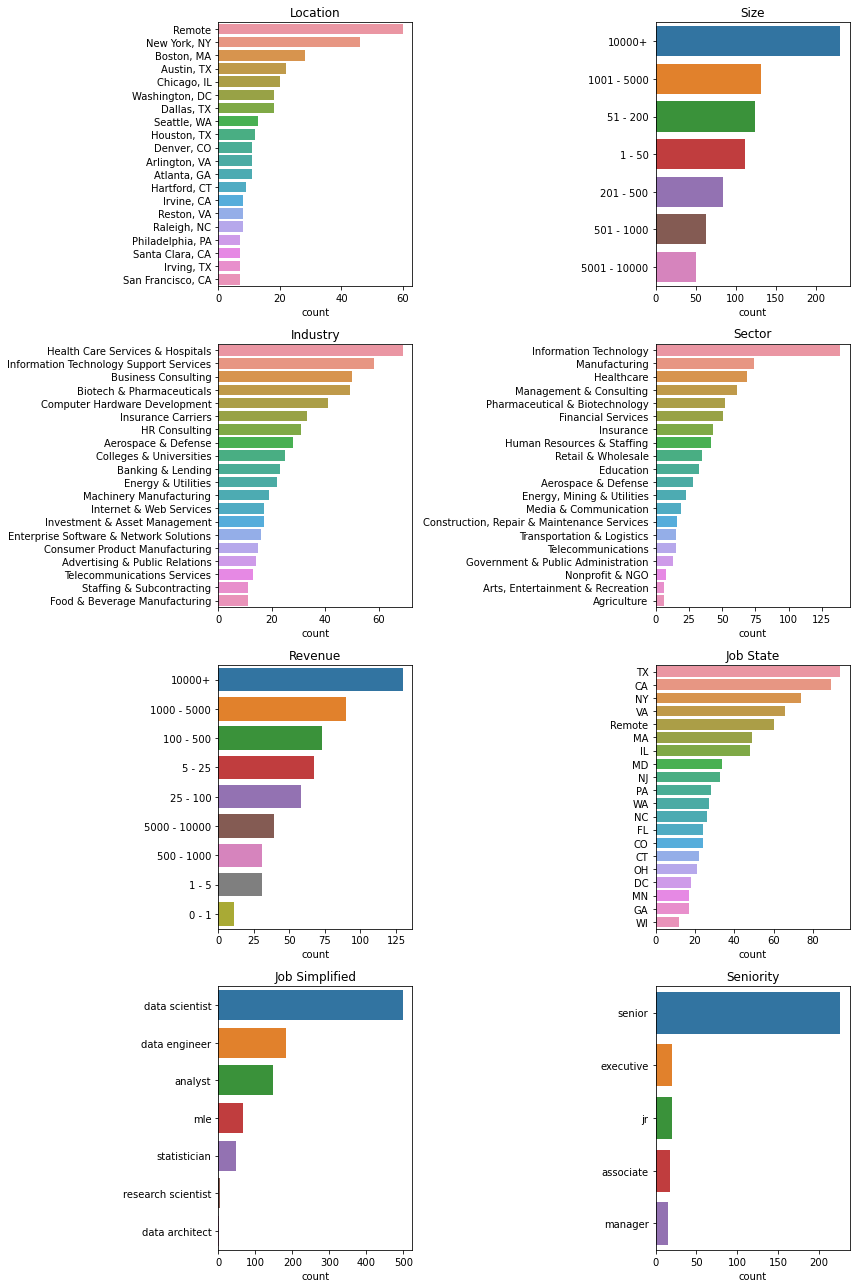

In [76]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Loop through each categorical variable and plot the countplot
for i, categorical in enumerate(categorical):
    
    #sns.countplot(x=categorical, data=df,order=df[categorical].value_counts().iloc[:10].index, ax=ax)
    
    #ax.set_title(categorical)

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(y=categorical, x='count', data=df[categorical].value_counts().iloc[:20].reset_index().rename(columns={categorical: 'count', 'index': categorical}), ax=ax)
    ax.set_title(categorical)
    ax.set(ylabel='')
    
fig.tight_layout()
plt.show()

Let's look for some correlation between each categorical variable and the salary using boxplots where salaries are grouped by the values of each categorical variable

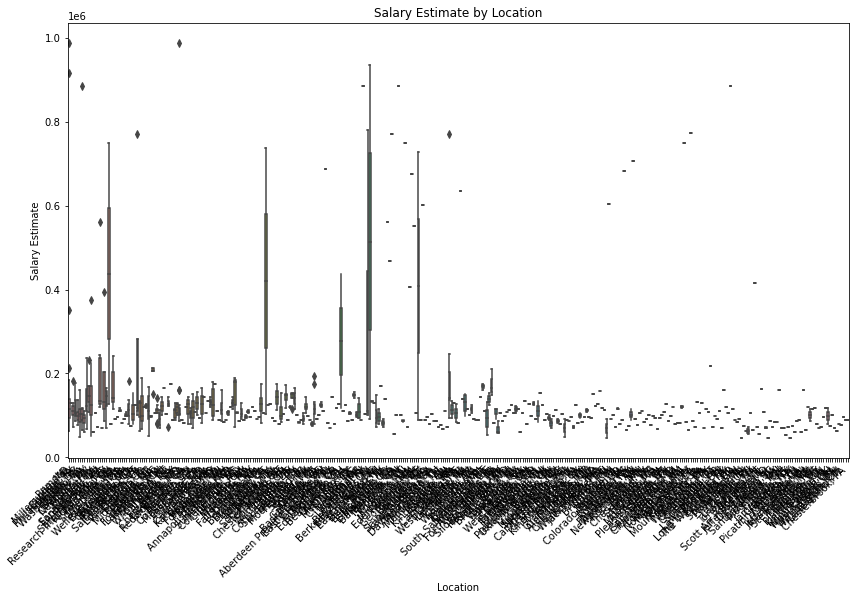

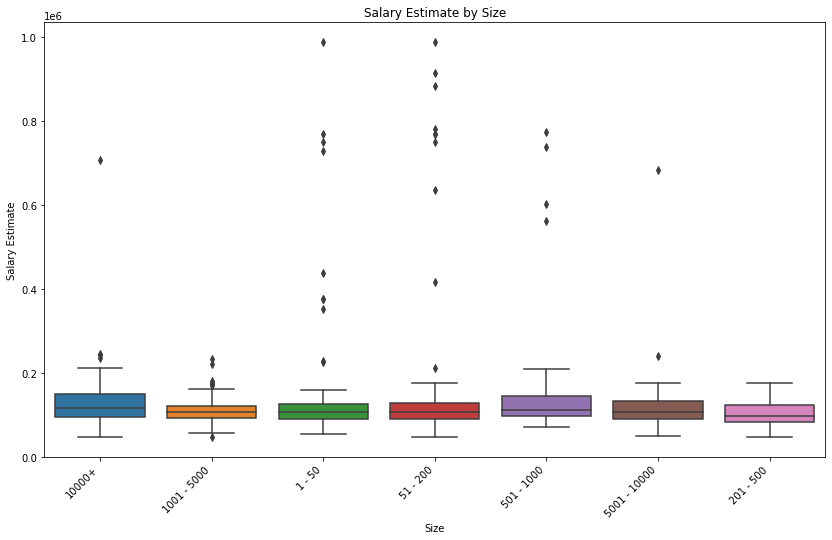

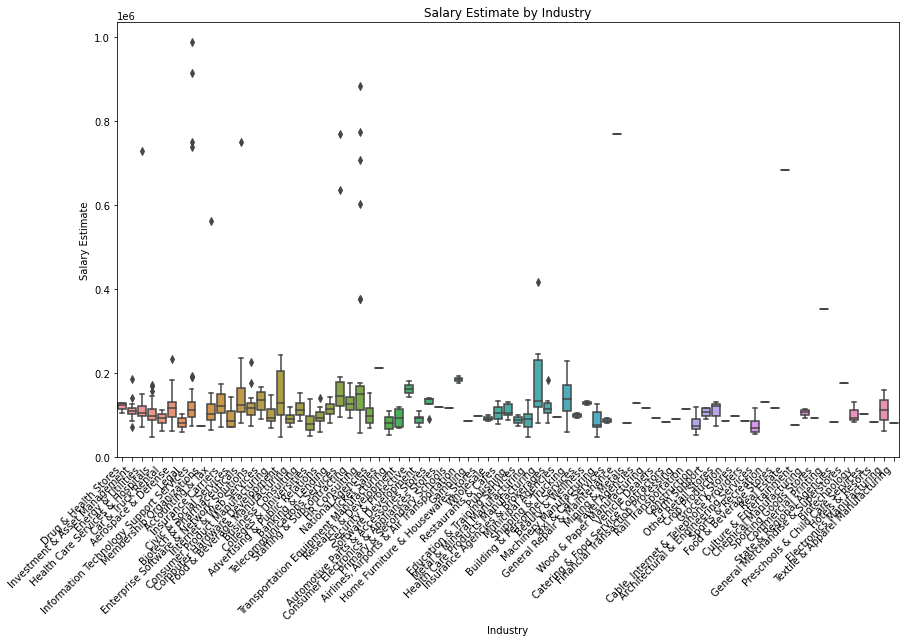

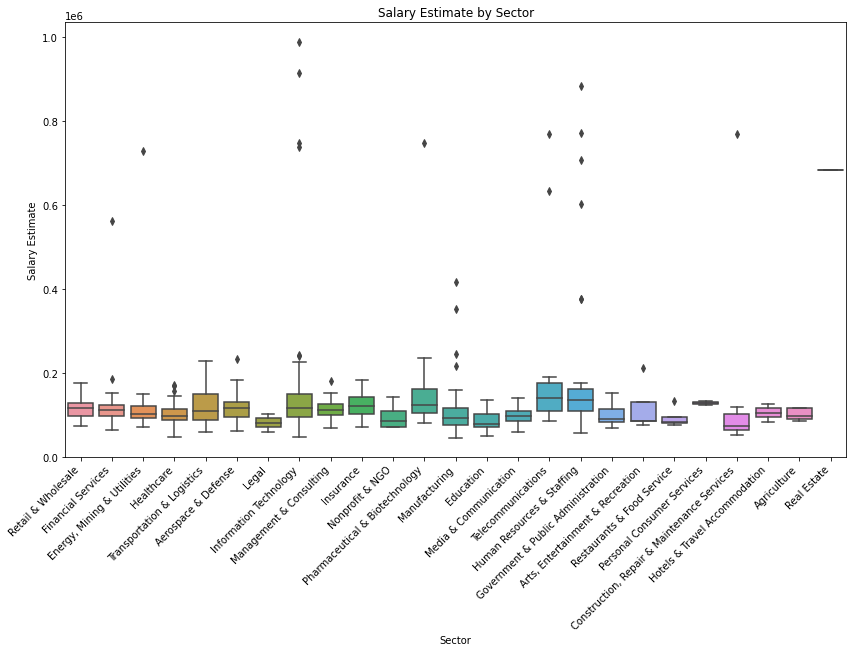

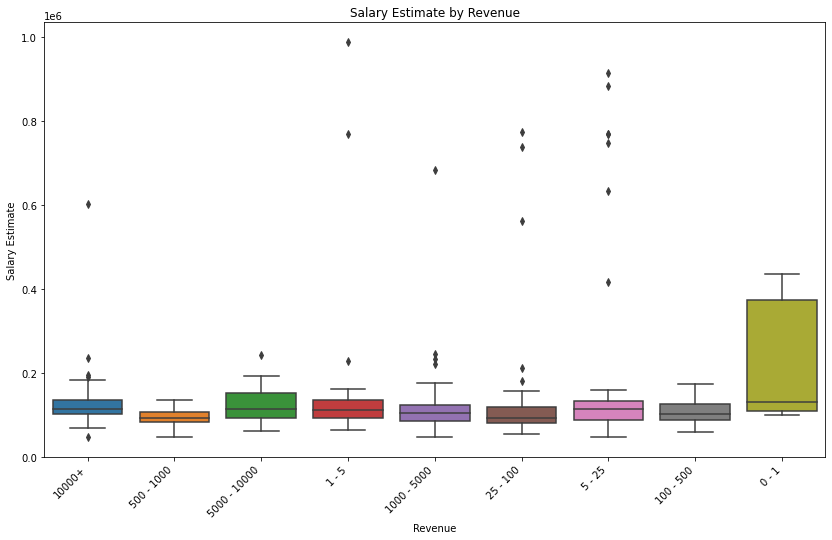

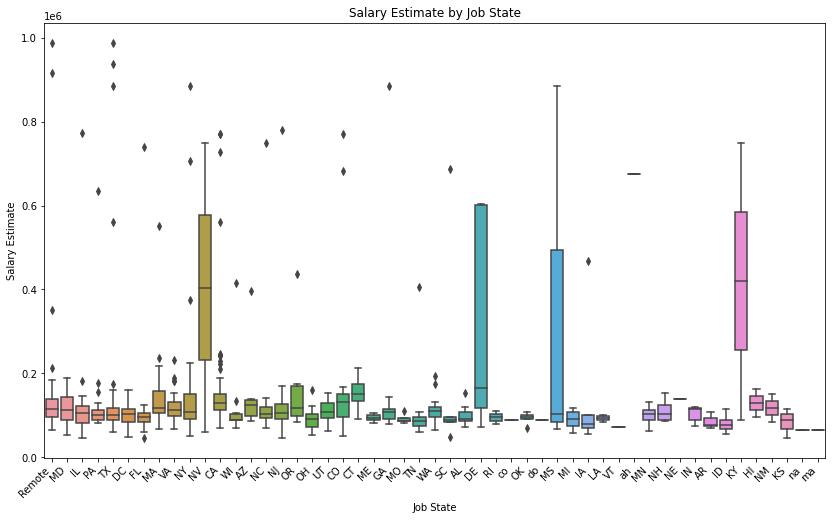

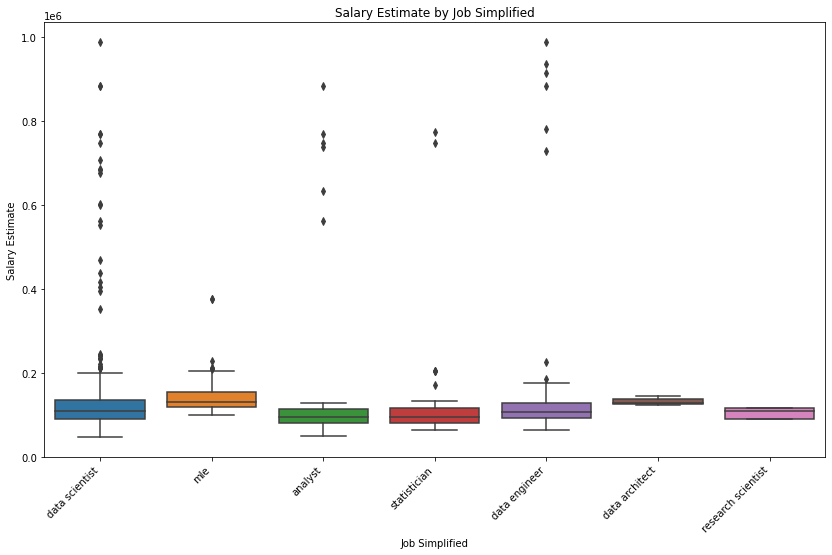

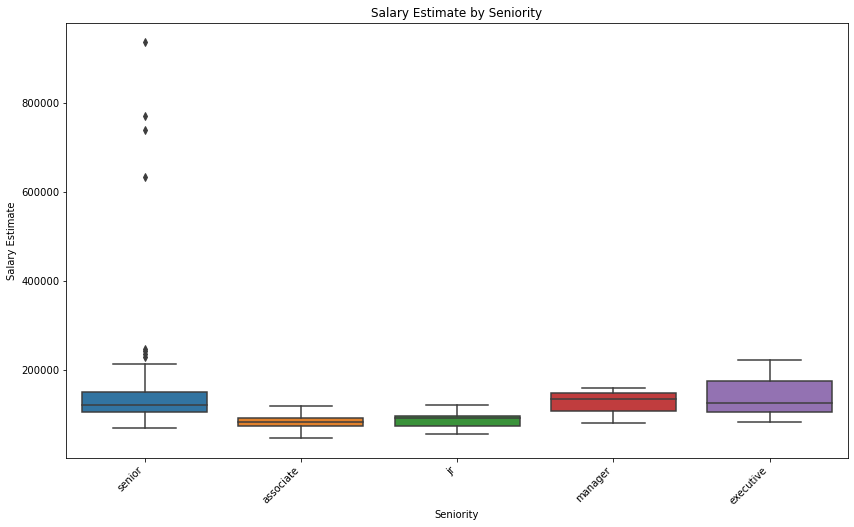

In [67]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

for category in categorical:
    plt.figure(figsize=(14, 8)) 
    sns.boxplot(data=df, x=category, y='Salary Estimate')
    plt.title(f'Salary Estimate by {category}')
    plt.xticks(rotation=45, ha='right') # rotate and align the x-axis labels
    plt.show()
    

In [68]:
df['Job Simplified'].value_counts()

data scientist        471
data engineer         164
mle                    59
analyst                49
statistician           46
research scientist      5
data architect          3
Name: Job Simplified, dtype: int64

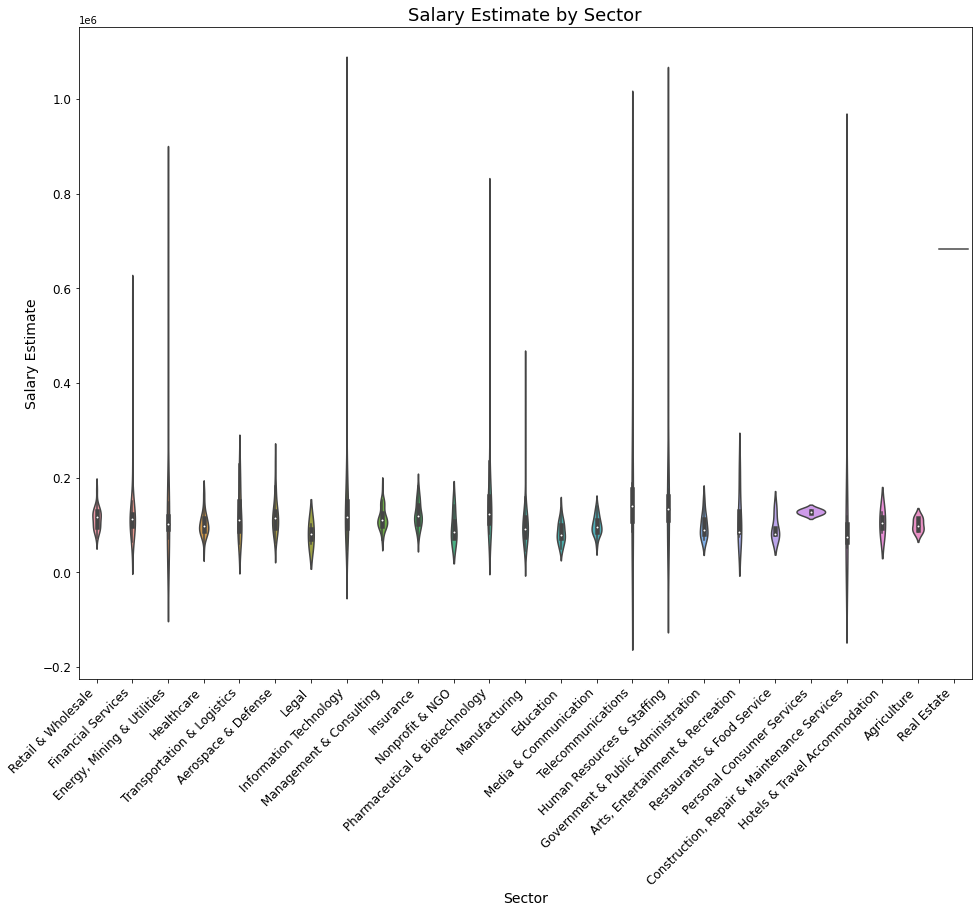

In [69]:
#Let's look at some correlation between sector and salary
# plot a violin plot of Salary Estimate by Sector
plt.figure(figsize=(16, 12))  
sns.violinplot(data=df, x='Sector', y='Salary Estimate')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Estimate by Sector', fontsize=18) 
plt.xlabel('Sector', fontsize=14)  
plt.ylabel('Salary Estimate', fontsize=14)  
plt.tick_params(labelsize=12)  
plt.show()

A chi-squared test to determine the independence between categorical variables

In [70]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']


for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cross_tab = pd.crosstab(df[categorical[i]], df[categorical[j]])
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print(f'Chi-Squared Test p-value for {categorical[i]} and {categorical[j]}:', p)

Chi-Squared Test p-value for Location and Size: 9.688876247820987e-07
Chi-Squared Test p-value for Location and Industry: 6.1103965372101364e-92
Chi-Squared Test p-value for Location and Sector: 1.2903473450759191e-60
Chi-Squared Test p-value for Location and Revenue: 0.000501345754072568
Chi-Squared Test p-value for Location and Job State: 0.0
Chi-Squared Test p-value for Location and Job Simplified: 0.2915043995514205
Chi-Squared Test p-value for Location and Seniority: 0.10094877424341597
Chi-Squared Test p-value for Size and Industry: 5.132356514687329e-17
Chi-Squared Test p-value for Size and Sector: 3.4024157995246163e-12
Chi-Squared Test p-value for Size and Revenue: 2.9247253169456403e-142
Chi-Squared Test p-value for Size and Job State: 0.00026755936355722247
Chi-Squared Test p-value for Size and Job Simplified: 0.10492943464482836
Chi-Squared Test p-value for Size and Seniority: 0.010699565166667535
Chi-Squared Test p-value for Industry and Sector: 0.0
Chi-Squared Test p-valu

In [71]:
alpha = 0.05
for i, var1 in enumerate(categorical[:-1]):
    for var2 in categorical[i+1:]:
        cross = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = chi2_contingency(cross)
        if p < alpha:
            print(f"{var1} and {var2} are significantly associated with p-value {p:.3f}") #meaning they are somehow dependent

Location and Size are significantly associated with p-value 0.000
Location and Industry are significantly associated with p-value 0.000
Location and Sector are significantly associated with p-value 0.000
Location and Revenue are significantly associated with p-value 0.001
Location and Job State are significantly associated with p-value 0.000
Size and Industry are significantly associated with p-value 0.000
Size and Sector are significantly associated with p-value 0.000
Size and Revenue are significantly associated with p-value 0.000
Size and Job State are significantly associated with p-value 0.000
Size and Seniority are significantly associated with p-value 0.011
Industry and Sector are significantly associated with p-value 0.000
Industry and Revenue are significantly associated with p-value 0.000
Industry and Job State are significantly associated with p-value 0.000
Industry and Job Simplified are significantly associated with p-value 0.000
Industry and Seniority are significantly as

<h2 style=color:green>Correct Version</h2>

In [72]:
# Select the columns of interest
cols_of_interest = ['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State', 'Job Simplified', 'Seniority', 'Salary Estimate']
data = df[cols_of_interest]


for col in ['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State', 'Job Simplified', 'Seniority']:
    cont_table = pd.crosstab(data[col], data['Salary Estimate'])
    stat, p, dof, expected = chi2_contingency(cont_table)
    print(f"Chi-squared test for {col}:")
    print(f"p-value = {p}")
    if p < 0.05:
        print(f"There is a significant association between {col} and the Salary Estimate.\n")
    else:
        print(f"There is no significant association between {col} and the Salary Estimate.\n")

Chi-squared test for Location:
p-value = 3.4675974837373706e-39
There is a significant association between Location and the Salary Estimate.

Chi-squared test for Size:
p-value = 0.05096909093714038
There is no significant association between Size and the Salary Estimate.

Chi-squared test for Industry:
p-value = 0.008677903682318163
There is a significant association between Industry and the Salary Estimate.

Chi-squared test for Sector:
p-value = 8.852740938904682e-08
There is a significant association between Sector and the Salary Estimate.

Chi-squared test for Revenue:
p-value = 0.06411914254531989
There is no significant association between Revenue and the Salary Estimate.

Chi-squared test for Job State:
p-value = 0.8670666413984569
There is no significant association between Job State and the Salary Estimate.

Chi-squared test for Job Simplified:
p-value = 0.04051370124951619
There is a significant association between Job Simplified and the Salary Estimate.

Chi-squared test fo

In [74]:
df.groupby('Job State')['Salary Estimate'].mean().sort_values(ascending=False).to_frame()

,Salary Estimate
Job State,
ah,676000
KY,419420
NV,404400
MS,351309
DE,311680
SC,182131
CO,180831
CA,161856
OR,160956


In [99]:
df[df['Job State']=='ma']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority,Size Order
1163,Field Engineer/Hydrographic Surveyor,65000,LOCATION: Texas Gulf Coast & Alabama OVERVIEW:...,5,Encore Dredging Partners,Alabama,201 - 500,Construction,"Construction, Repair & Maintenance Services",NaN,ma,data scientist,None,2


In [88]:
#define a function which draws the graphs, given a name, an order and a width of the figure

def make_grouped_and_count_ordered_graph(name, order, width=10):
    
        # group the data by Seniority and compute the mean of Salary Estimate for each group
    grouped_df = df.groupby(name)['Salary Estimate'].mean()

    count_df = df.groupby(name)[name].size()


    # map the seniority levels to their corresponding numerical values using a lambda function
    grouped_df.index = grouped_df.index.map(lambda x: order[x])
    count_df.index = count_df.index.map(lambda x: order[x])

    fig, ax1 = plt.subplots(figsize=(width, 6))

    # Plot the mean salary on the first subplot
    ax1.scatter(grouped_df.index, grouped_df.values, color='blue')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Mean Salary Estimate', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x')

    # Create a second axis with the same x-axis as the first subplot
    ax2 = ax1.twinx()

    # Plot the count of entries on the second subplot
    bar_width = 0.5
    ax2.bar(count_df.index, count_df.values, width=bar_width, color='orange', alpha=0.5)
    ax2.set_ylabel('Count of Entries', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.tick_params(axis='x', labelrotation=90)

    # Reverse the mapping and use the original seniority level names as the tick labels
    tick_labels = [level for level, value in sorted(order.items(), key=lambda x: x[1]) if value in grouped_df.index]
    ax1.set_xticks(sorted(grouped_df.index))
    ax1.set_xticklabels(tick_labels)

    #write the value in each point of the scatterplo
    for i, value in enumerate(grouped_df.values):
        ax1.annotate("{:.2f}".format(value), (grouped_df.index[i], value))

    # Adjust the x-axis tick labels and spacing
    plt.subplots_adjust(bottom=0.2)

    # Show the plot
    plt.show()


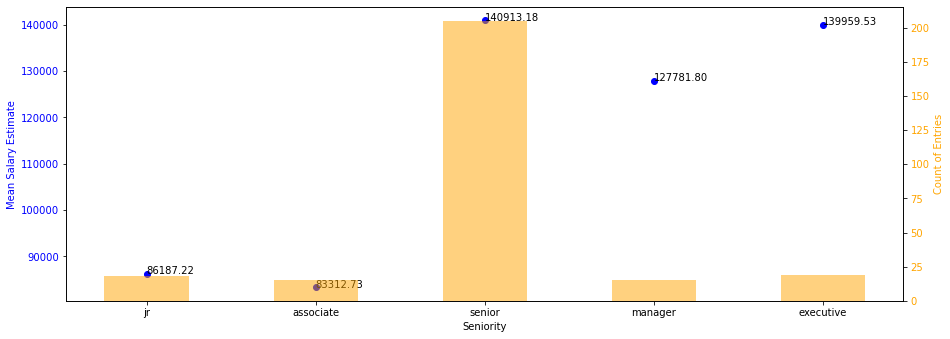

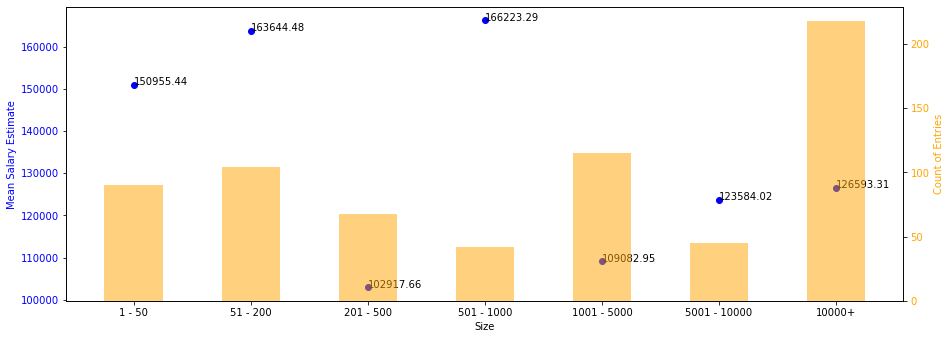

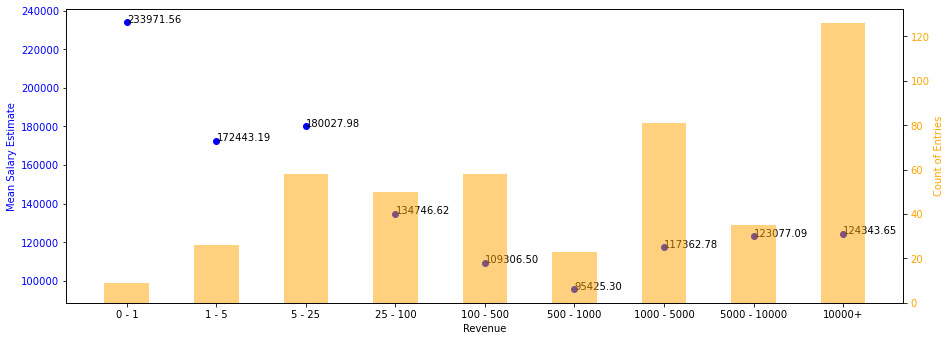

In [89]:
seniority_order = {'jr': 0, 'associate': 1, 'senior': 2, 'manager': 3, 'executive': 4}
size_order = {'1 - 50': 0, '51 - 200': 1, '201 - 500': 2, '501 - 1000': 3, '1001 - 5000': 4, '5001 - 10000': 5, '10000+': 6}
revenue_order = {'0 - 1': 0, '1 - 5': 1, '5 - 25': 2, '25 - 100': 3, '100 - 500': 4, '500 - 1000': 5, '1000 - 5000': 6, '5000 - 10000': 7, '10000+':8}
make_grouped_and_count_ordered_graph('Seniority', seniority_order,15)
make_grouped_and_count_ordered_graph('Size', size_order,15)
make_grouped_and_count_ordered_graph('Revenue', revenue_order, 15)

In [92]:
#let's give a look inside salaries in companies with 0 - 1 millions revenues
df[df['Revenue']=='0 - 1']

#some of them are exagerated: if a company get 1 million revenue cannot pay an employee more than 200000 $
#we implement this in the data cleaning function

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority,Size Order
43,Machine Learning Engineer,100000,Job Title : AI Engineer / Architect with Exper...,4,Stemuli Studios Inc.,Remote,1 - 50,Business Consulting,Management & Consulting,0 - 1,Remote,mle,None,0
89,"Staff Software Engineer, Machine Learning",130000,We are currently recruiting for a Staff Softwa...,-1,Oculus Search Partners LLC,"Carlsbad, CA",1 - 50,None,None,0 - 1,CA,mle,None,0
168,Deep Machine Learning Engineer (Expert Level P...,375000,Refer a friend: Referral fee program BIO/PHAR...,5,Career Developers,NaN,1 - 50,HR Consulting,Human Resources & Staffing,0 - 1,None,mle,None,0
203,Data Scientist - Mid,110438,Contingent upon contract award JOB DESCRIPTION...,4,"Broadleaf, Inc","Manassas, VA",1 - 50,None,None,0 - 1,VA,data scientist,None,0
204,Data Scientist,108390,MARKETview Education Partners is seeking brigh...,4,MARKETview,"Richmond, VA",1 - 50,None,None,0 - 1,VA,data scientist,None,0
205,Data Scientist - Computer Vision,119012,Job Description Title: Data Scientist/Compute...,-1,Chabez Tech,"Santa Clara, CA",1 - 50,None,None,0 - 1,CA,data scientist,None,0
321,Facilities Engineer - Data Center/Mission Crit...,436800,This position reports to the Facilities Manage...,5,fifteenfortyseven Critical Systems Realty,"Portland, OR",1 - 50,None,None,0 - 1,OR,data scientist,None,0
859,AI engineer,351104,About Sticker Mule Sticker Mule is the Interne...,4,Sticker Mule,Remote,1 - 50,Commercial Printing,Manufacturing,0 - 1,Remote,data scientist,None,0
1052,Deep Machine Learning Engineer (Expert Level P...,375000,Refer a friend: Referral fee program BIO/PHAR...,5,Career Developers,"New York, NY",1 - 50,HR Consulting,Human Resources & Staffing,0 - 1,NY,mle,None,0


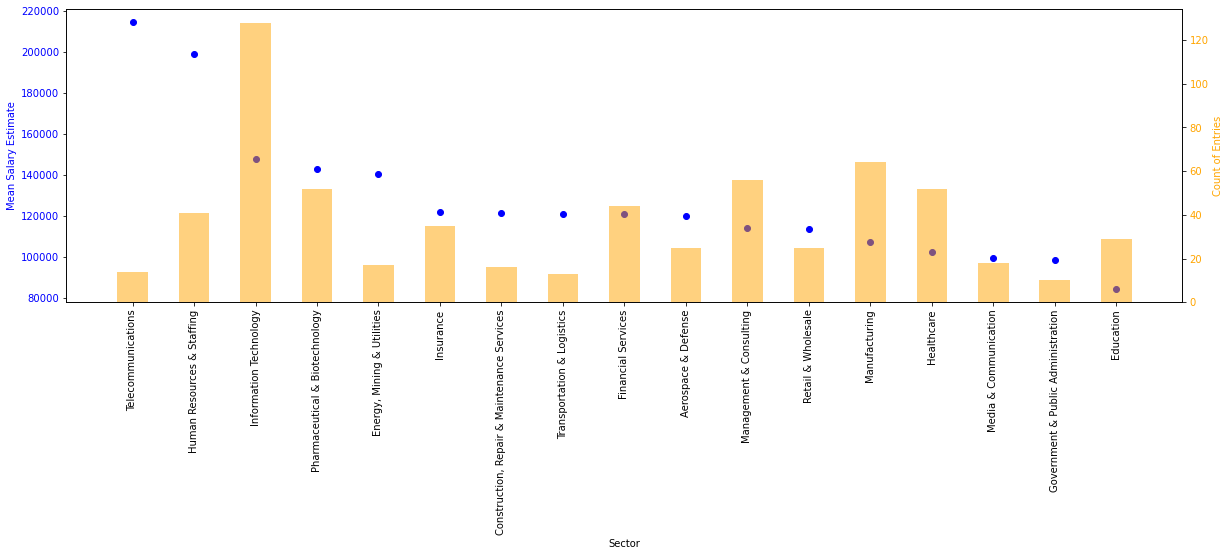

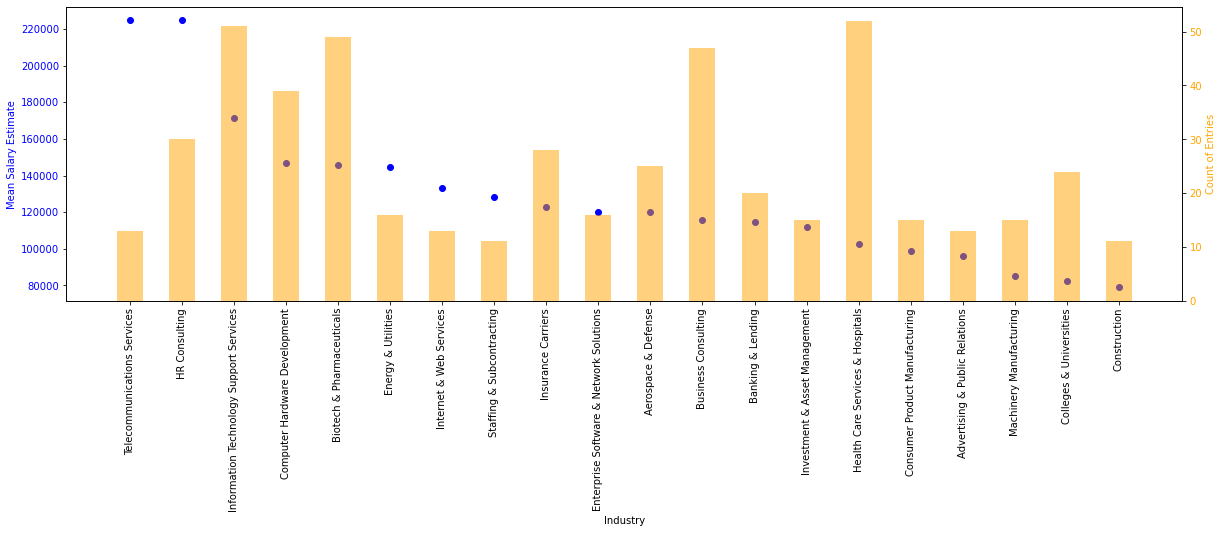

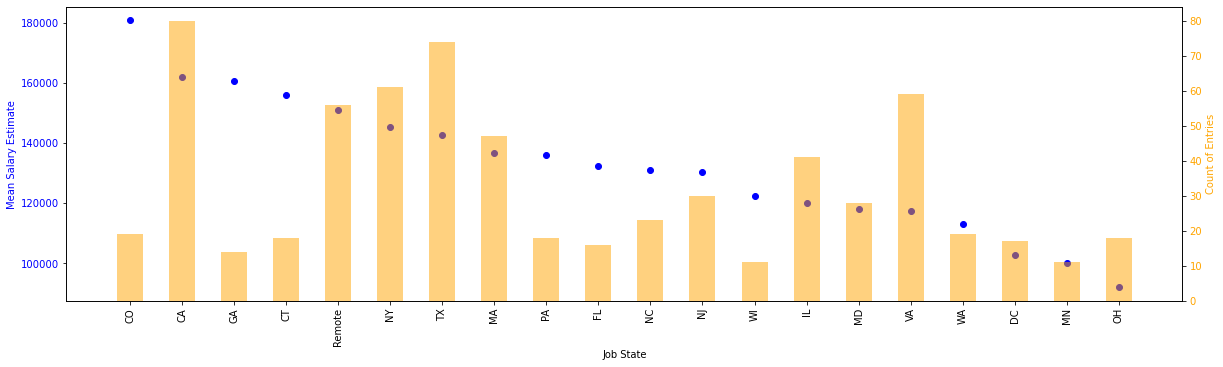

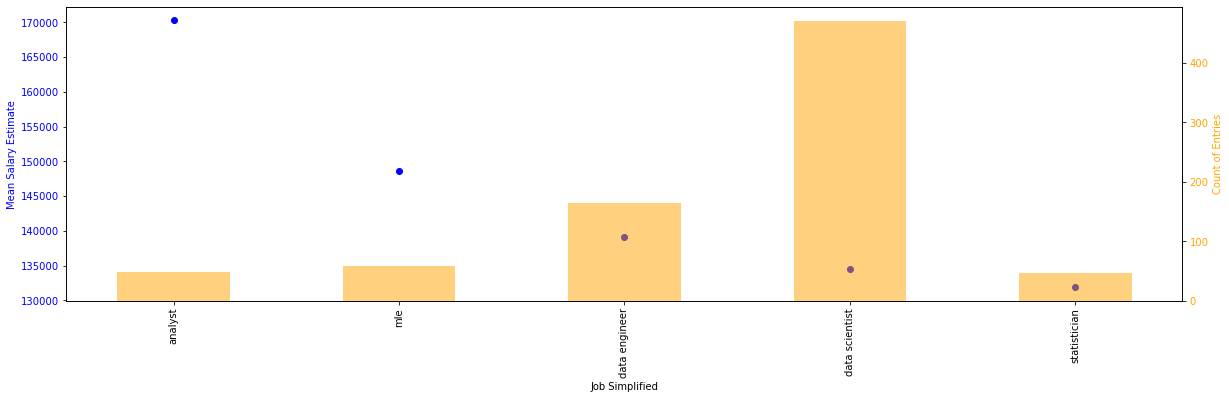

In [87]:
names = ['Sector','Industry','Job State', 'Job Simplified']
for name in names:
    #remove the rows whose size is less than 10: we need at least 10 values to be reliable!
    grouped_df = df.groupby(name)['Salary Estimate'].mean()
    count_df = df.groupby(name)[name].size()
    # Filter out groups with fewer than 10 entries
    count_df = count_df[count_df >= 10]
    grouped_df = grouped_df.loc[count_df.index]

    # Sort the table in descending order by salary
    grouped_df = grouped_df.sort_values(ascending=False)[:20]
    count_df = count_df.loc[grouped_df.index]

    # Create a figure with two subplots sharing the same x-axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot the mean salary on the first subplot
    ax1.scatter(grouped_df.index, grouped_df.values, color='blue')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Mean Salary Estimate', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', labelrotation=90)

    # Create a second axis with the same x-axis as the first subplot
    ax2 = ax1.twinx()

    # Plot the count of entries on the second subplot
    bar_width = 0.5
    ax2.bar(count_df.index, count_df.values, width=bar_width, color='orange', alpha=0.5)
    ax2.set_ylabel('Count of Entries', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.tick_params(axis='x', labelrotation=90)
    # Adjust the x-axis tick labels and spacing
    plt.xticks(rotation=90, ha='center')
    plt.subplots_adjust(bottom=0.2)
    

    # Show the plot
    plt.show()

In [9]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority
0,Designer UIX NLP/NLU,117500,* W2 Only *\r The successful candidate will pr...,-1,"RightFit Talent Brokers, LLC",Remote,NaN,None,None,NaN,Remote,data scientist,None
1,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1,Signal Systems Corporation,"Millersville, MD",NaN,None,None,NaN,MD,mle,None
2,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\r \r Walgreens, one of the nation...",3,WALGREENS,"Chicago, IL",10000+,Drug & Health Stores,Retail & Wholesale,10000+,IL,mle,senior
3,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1,"innoVet Health, LLC",Remote,NaN,None,None,NaN,Remote,data scientist,None
4,Machine Learning Engineer,112751,Supports and performs the development and prog...,4,Vanguard,"Philadelphia, PA",10000+,Investment & Asset Management,Financial Services,NaN,PA,mle,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,"Senior Data Scientist, Product",149166,ABOUT EARNIN:\r As one of the first pioneers o...,4,EarnIn,"Palo Alto, CA",201 - 500,Information Technology Support Services,Information Technology,NaN,CA,data scientist,senior
1377,Data Scientist Machine Learning Engineer,99950,"Primary Responsibilities to Include:\r Design,...",4,Plasma Computing Group,"Dallas, TX",51 - 200,Enterprise Software & Network Solutions,Information Technology,1 - 5,TX,mle,None
1383,Senior Systems Engineer - Systems Modeling & C...,125000,You will have an opportunity to directly impac...,4,Cenergy International Services,"Boston, MA",10000+,Energy & Utilities,"Energy, Mining & Utilities",10000+,MA,data scientist,senior
1384,Data Scientist,110100,Please email hr_business_partners@bcbsri.org i...,4,Blue Cross & Blue Shield of Rhode Island,"Providence, RI",501 - 1000,Insurance Carriers,Insurance,NaN,RI,data scientist,None


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        951 non-null    object 
 1   Salary Estimate  951 non-null    int64  
 2   Job Description  951 non-null    object 
 3   Rating           951 non-null    float64
 4   Company Name     951 non-null    object 
 5   Location         939 non-null    object 
 6   Size             797 non-null    object 
 7   Industry         762 non-null    object 
 8   Sector           762 non-null    object 
 9   Revenue          530 non-null    object 
 10  Job State        934 non-null    object 
 11  Job Simplified   951 non-null    object 
 12  Seniority        299 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 104.0+ KB


ML Models

The first model implemented is Linear Regression

In [109]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority', 'Vader'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1388
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        951 non-null    object 
 1   Salary Estimate  951 non-null    int64  
 2   Job Description  951 non-null    object 
 3   Rating           951 non-null    float64
 4   Company Name     951 non-null    object 
 5   Location         939 non-null    object 
 6   Size             797 non-null    object 
 7   Industry         762 non-null    object 
 8   Sector           762 non-null    object 
 9   Revenue          530 non-null    object 
 10  Job State        934 non-null    object 
 11  Job Simplified   951 non-null    object 
 12  Seniority        299 non-null    object 
 13  Vader            951 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 111.4+ KB


We first choose which features to include in our model. 
Variables missing too many values are not going to be included (Revenue, Seniority)
Job Title and Job description are not going to be included. We're gonna use Job Simplified which is a simplified version of the job title

In [111]:
model_data=df[['Salary Estimate', 'Rating', 'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Job State', 'Job Simplified', 'Vader']]

Categorical Variables need to be turned into dummy variables

In [112]:
model_dummies=pd.get_dummies(model_data)

This is a supervised learning problem and our target variable is the Salary Estimate.

We need to split the dataset into training and test sets.

In [113]:
from sklearn.model_selection import train_test_split


X = model_dummies.drop(columns=['Salary Estimate'])
y = model_dummies['Salary Estimate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1388
Columns: 1357 entries, Rating to Job Simplified_statistician
dtypes: float64(2), uint8(1355)
memory usage: 1.3 MB


We now run our Linear Regression model including these variables

In [115]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

# create a linear regression model and fit it to the training data
model = sm.OLS(y_train, X_train, missing='drop')
results = model.fit()

# print the summary of the model
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:        Salary Estimate   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     42.83
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           6.88e-50
Time:                        17:53:20   Log-Likelihood:                -7828.3
No. Observations:                 760   AIC:                         1.701e+04
Df Residuals:                      81   BIC:                         2.016e+04
Df Model:                         678                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Let's see how it performs on the test set:

In [116]:
# make predictions on the test data
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

# calculate the R-squared value on the test data
SSres = np.sum((y_test - y_pred) ** 2)
SStot = np.sum((y_test - np.mean(y_test)) ** 2)
R2 = 1 - (SSres / SStot)
print("R-squared value on test data:", R2)

R-squared value on test data: -0.08983604401862721
